<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [34]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!

### Load Data and Explore

In [35]:
df = pd.read_csv("car_insurance.csv")

df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [37]:
df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


### Fill missing values

In [38]:
df[['credit_score','annual_mileage']].describe()

,credit_score,annual_mileage
count,9018.000000,9043.000000
mean,0.515813,11697.003207
std,0.137688,2818.434528
min,0.053358,2000.000000
25%,0.417191,10000.000000
50%,0.525033,12000.000000
75%,0.618312,14000.000000
max,0.960819,22000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

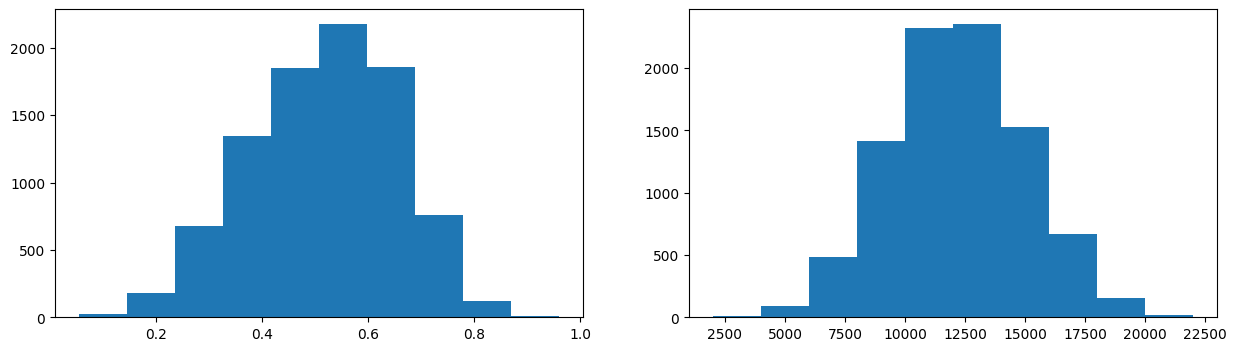

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(df['credit_score'])
ax[1].hist(df['annual_mileage'])
plt.show

Here, we can see that the columns appear to be normally distributed. 
There are no visible extreme outliers or significant skewness. 
That's why we will replace missing values with the mean.

In [40]:
# Fill missing values with mean value
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

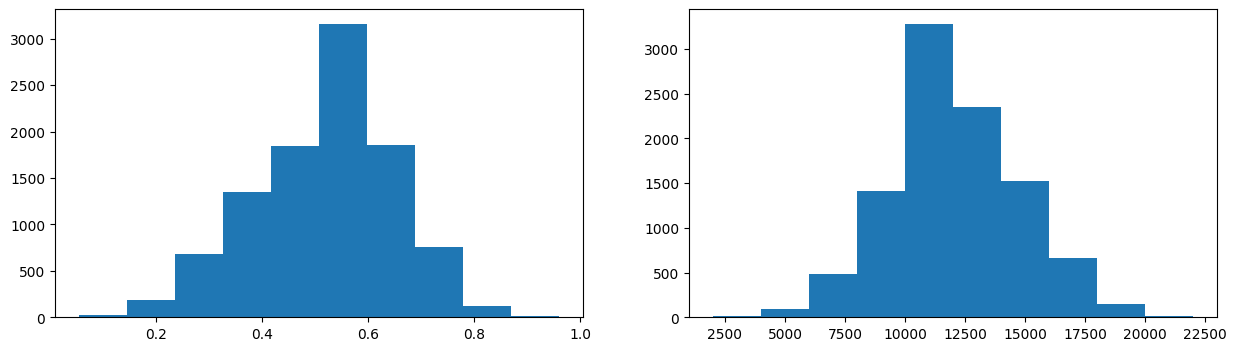

In [41]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))

ax[0].hist(df['credit_score'])
ax[1].hist(df['annual_mileage'])
plt.show

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

### Transform categorical cols

In [43]:
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"{col}: {df[col].nunique()}")
    print(f"{df[col].value_counts()}")

driving_experience: 4
driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64
education: 3
education
high school    4157
university     3928
none           1915
Name: count, dtype: int64
income: 4
income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64
vehicle_year: 2
vehicle_year
before 2015    6967
after 2015     3033
Name: count, dtype: int64
vehicle_type: 2
vehicle_type
sedan         9523
sports car     477
Name: count, dtype: int64


Here, we can clearly see `driving_experience`, `education`, and `income` are ordinal. As for binary nomial columns: `vehicle_year` and `vehicle_type`, they have only 2 values. So, we will use label encoding for all categorical columns. 

In [44]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    print(f"{df[col].value_counts()}")

driving_experience
0    3530
1    3299
2    2119
3    1052
Name: count, dtype: int64
education
0    4157
2    3928
1    1915
Name: count, dtype: int64
income
2    4336
0    2138
1    1814
3    1712
Name: count, dtype: int64
vehicle_year
1    6967
0    3033
Name: count, dtype: int64
vehicle_type
0    9523
1     477
Name: count, dtype: int64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  int32  
 4   education            10000 non-null  int32  
 5   income               10000 non-null  int32  
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  int32  
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       10000 non-null  float64
 13  vehicle_type         10000 non-null  int32  
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [46]:
df.describe()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,1.069300,0.97710,1.562200,0.515813,0.697000,0.696700,0.498200,0.688800,19864.548400,11697.003207,0.047700,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.990452,0.89892,1.008084,0.130752,0.459578,0.459707,0.500022,0.463008,18915.613855,2680.167384,0.213141,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.000000,0.00000,1.000000,0.431509,0.000000,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,1.000000,1.00000,2.000000,0.515813,1.000000,1.000000,0.000000,1.000000,10238.000000,11697.003207,0.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,2.000000,2.00000,2.000000,0.607607,1.000000,1.000000,1.000000,1.000000,32765.000000,13000.000000,0.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,3.000000,2.00000,3.000000,0.960819,1.000000,1.000000,1.000000,1.000000,92101.000000,22000.000000,1.000000,22.000000,6.00000,15.000000,1.000000


In [47]:
df.to_csv('../Modeling_Car_Insurance_Claim_Outcomes/transformed_car_insurance.csv', index=False)

### Prepare for modeling

In [48]:
# Create a list to store the models
models_list = []

# Split df into features and target 
features = df.iloc[:,1:-1]
target = df.iloc[:,-1]

In [49]:
print(features.shape)
print(target.shape)

(10000, 16)
(10000,)


### Build and store models

In [50]:
from sklearn import linear_model

# Create a list to store the models
models = []

# Loop through features and create Logistic Regression model
for col_name in features.columns:
    regressor = linear_model.LogisticRegression()
    col = features[[col_name]]
    regressor.fit(col,target)
    models.append(regressor)
    print(f"Built model for feature: {col_name}")

Built model for feature: age
Built model for feature: gender
Built model for feature: driving_experience
Built model for feature: education
Built model for feature: income
Built model for feature: credit_score
Built model for feature: vehicle_ownership
Built model for feature: vehicle_year
Built model for feature: married
Built model for feature: children
Built model for feature: postal_code
Built model for feature: annual_mileage
Built model for feature: vehicle_type
Built model for feature: speeding_violations
Built model for feature: duis
Built model for feature: past_accidents


### Measure performance

In [51]:
from sklearn.metrics import confusion_matrix

# Create a list to store individual metrics of each model
metrics = []

# Create a list to store model accuracies
accuracies = []

# Loop through the index of the models list
for i in range(len(models)):
    
    # Get col name for prediction
    col = features.iloc[:, i].values.reshape(-1, 1)
    # print(col)
    
    # Predict using the i-th model
    predictions = models[i].predict(col)
    
    # Create a confusion matrix and store individual metrics
    conf_matrix = confusion_matrix(target, predictions)
    # print(conf_matrix)
    
    # Find and store TN, TP, FN, FP from conf_matrix
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    TP = conf_matrix[1,1]
    
    metrics.append({    
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'TP': TP
    })
        
    # Calculate accuracy and store the model's results
    accuracy = (TP + TN) / (TN + FP + FN + TP)
    # print(accuracy)
    accuracies.append(accuracy)

print(accuracies)

[0.7747, 0.6867, 0.7771, 0.6867, 0.6867, 0.7049, 0.7351, 0.6867, 0.6867, 0.6867, 0.6867, 0.6904, 0.6867, 0.6867, 0.6867, 0.6867]


c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\xnoor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, 

### Find the best performing model

In [52]:
# Find the largest accuracy score
best_accuracy = max(accuracies)
print(best_accuracy)

# Identify the index of accuracies with the largest score
best_model_index = accuracies.index(best_accuracy)
print(best_model_index)

# Map the highest accuracy to the feature
best_feature = features.columns[best_model_index]
print(best_feature)

0.7771
2
driving_experience


In [53]:
# Create a dataframe containing best_feature and best_accuracy
best_feature_df = pd.DataFrame({
    'best_feature': [best_feature],
    'best_accuracy': [best_accuracy]
})

print(best_feature_df)

         best_feature  best_accuracy
0  driving_experience         0.7771
